# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Reading the files completed")

Reading the files completed


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
#image_shape = X_train.shape[1:]
image_shape = (X_train.shape[1], X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

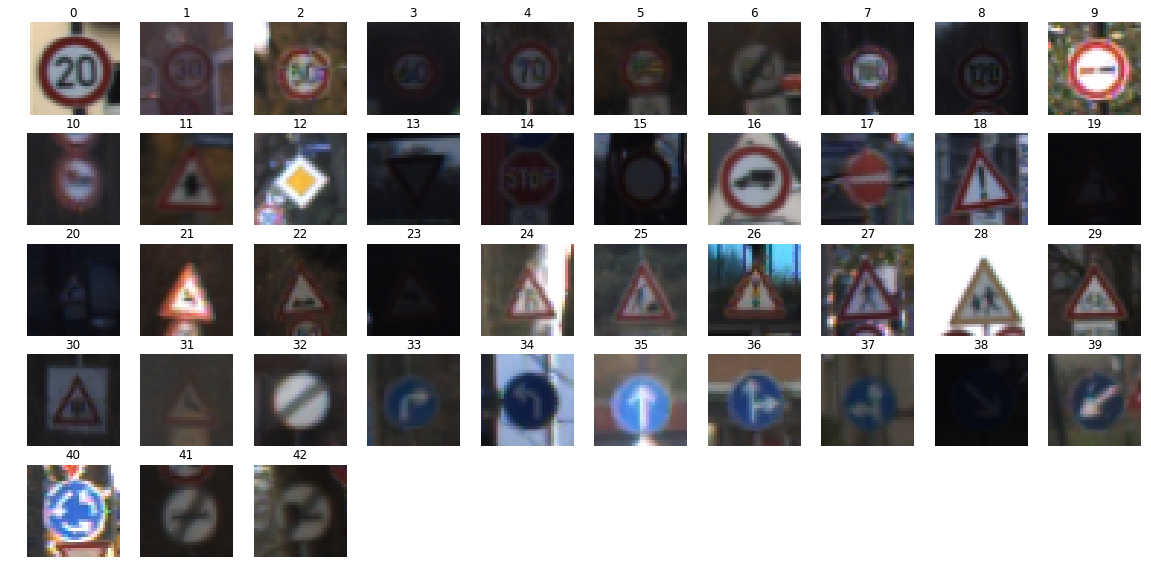

Text(0.5,1,'Distribution')

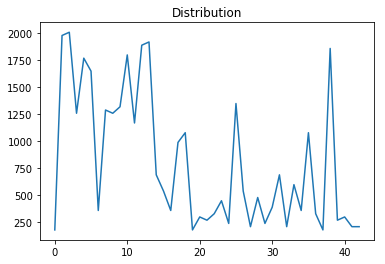

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

fig = plt.figure(figsize=(20, 20))
classes_count = []

labels, idx = np.unique(y_train, return_index=True)

# Render one image from each of the classes
for i, val in enumerate(idx):
    fig.add_subplot(10, 10, i+1)
    plt.imshow(X_train[val])
    plt.axis('off')
    plt.title(str(y_train[val]))
    
plt.show()

# Print the distribution of the training data
for i in labels:
    classes_count.append(np.sum(y_train == i)) 


plt.figure()

plt.plot(classes_count)
plt.title('Distribution')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
from sklearn.preprocessing import LabelBinarizer
import cv2

def grayscale(img):
    # From previous assignment
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to grayscale
def convert_to_grayscale(dataset_, num_samples_, image_shape_):
    # Reduces the channels from RGB to grayscale
    # Iterate for each value and then use the method above
    
    gray = np.empty([num_samples_, image_shape_[0], image_shape_[1]], dtype=dataset_.dtype)
    for index in range(0, num_samples_):
        gray[index,:,:] = grayscale(dataset_[index,:,:,:])
    
    return gray

# Normalization is important to have all image set under same scale
# This will help the optimizer to reach global minima quickly as well
def normalize_data(img_):
    """
    # REF: http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    
    """
    gray_min = 0
    gray_max = 255
    
    min = 0.1
    max = 0.9
    
    slope = (max - min)/( gray_max - gray_min )
    b = min
    return slope*(img_.astype(np.float32) - gray_min) + min


# Convert the labels in one hot encoding, as shown in the lectures
# Use LabelBinarizer to make life easy...

def encode_labels(labels):
    encode = LabelBinarizer()
    encoded_label = encode.fit_transform(labels)

    return encoded_label

In [5]:
# Preprocess Data
X_train_gray = convert_to_grayscale(X_train, n_train, image_shape)
X_train_norm = normalize_data(X_train_gray)
y_train_encoded = encode_labels(y_train)

X_test_gray = convert_to_grayscale(X_test, n_test, image_shape)
X_test_norm = normalize_data(X_test_gray)
y_test_encoded = encode_labels(y_test)

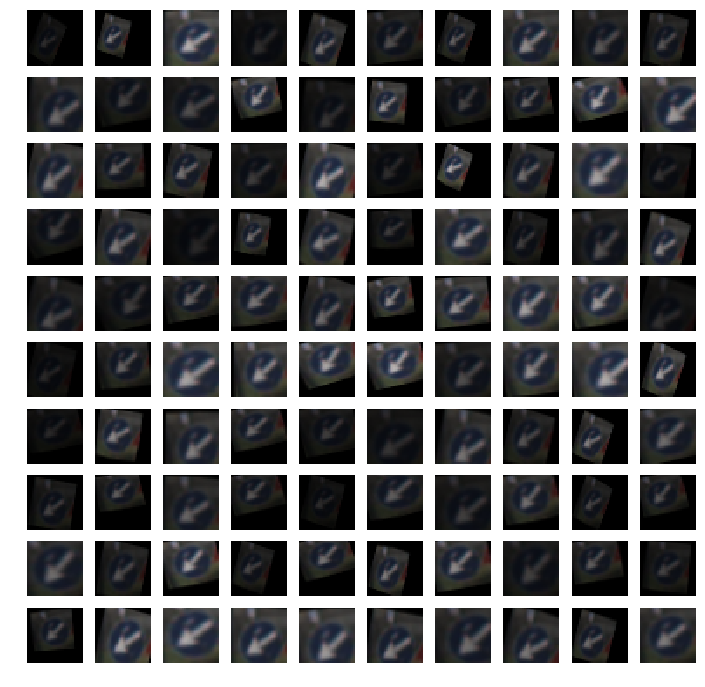

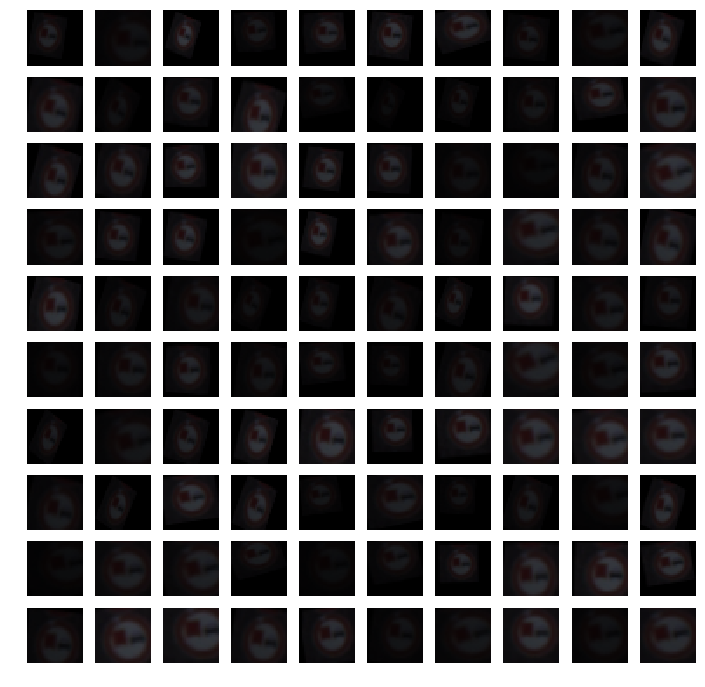

In [6]:
# REF: Using the image augmentation apis from https://github.com/vxy10/ImageAugmentation

#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# show image of 10 random data points
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

import numpy as np
%matplotlib inline
import matplotlib.image as mpimg

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness 
    

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    img = augment_brightness_camera_images(img)
    
    return img


# Displaying couple of images with transformations ( using the above utility methods ) as an example below

for i in range(2):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])


    gs1 = gridspec.GridSpec(10, 10)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
    plt.figure(figsize=(12,12))
    for i in range(100):
        ax1 = plt.subplot(gs1[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        img = transform_image(image,20,10,5)
        plt.subplot(10,10,i+1)
        plt.imshow(img)
        plt.axis('off')

    plt.show()

In [ ]:
# Check the labels to get the count of images for each label
#######################################################################

values, count = np.unique(y_train, return_counts=True)
orig_X_train_count = X_train.shape[0]

# iterate the label values [43] and transform image for the specified class
#######################################################################

for i in values:
    print("Transforming the images from class :", i)
    num = count.max()-count[i]
    _index = next(idx for idx, value in enumerate(y_train) if value==i)
    img = X_train[_index]
    i = i.reshape([1])
    
    for num in range(0,num):
        augmented_img = transform_image(img,22,16,6)
        augmented_img = augmented_img.reshape([1, 32, 32, 3])
        X_train = np.concatenate([X_train, augmented_img])
        y_train = np.concatenate([y_train, i])
    
new_training_samples = X_train.shape[0] - orig_X_train_count
print("X_train: ", X_train.shape[0])
print("Newly added training samples: ", new_training_samples)

#######################################################################

# Easy to save data to avoid this step each time for same images
# Just save the training images and labels as only those are modified

data_file = 'augmented_images.pickle'
if not os.path.isfile(data_file):
    try:
        with open('augmented_images.pickle', 'wb') as pfile:
            pickle.dump(
                {
                    'X_train': X_train,
                    'y_train': y_train,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as exp:
        print('Error saving file', data_file, ':', exp)
        raise

print('File' + data_file + ' saved.')


In [ ]:
# Perform this step, if you just want to reload the augmented images from the saved file
# Else execute only the previous step
#######################################################################

transformed_file = 'transformed_data.pickle'

with open(transformed_file, 'rb') as f:
    pickle_data = pickle.load(f)
    X_train = pickle_data['X_train']
    y_train = pickle_data['y_train']
    del pickle_data

print('X_train and y_train successfully loaded from saved file.')
print('X_Train = ', X_train.shape[0])
print('Y_Train = ', y_train.shape[0])
    
#######################################################################

# Redo the preprocessing and dump it in memory

X_train_gray = convert_to_grayscale(X_train, X_train.shape[0], image_shape)
X_train_norm = normalize_data(X_train_gray)
y_train_encoded = encode_labels(y_train)

In [6]:
# Split train and test data using scikit api
# REF: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
from random import randint
#######################################################################

# Can use stratify as shuffle is true
(train_features, valid_features, train_labels, valid_labels) = \
train_test_split(X_train_norm, y_train_encoded, test_size=0.06, random_state=randint(0,9999), stratify=y_train_encoded)

# Verify the shape info..caused lot of troubled.. !
test_features = X_test_norm
print(X_test_norm.shape)
test_labels = y_test_encoded
print(y_test_encoded.shape)

(12630, 32, 32)
(12630, 43)


In [7]:
#TODO Try with batch normalization later
# A good example is below from
# https://gist.github.com/tomokishii/0ce3bdac1588b5cca9fa5fbdf6e1c412

def batch_norm(x, n_out, phase_train):
    """
    Batch normalization on convolutional maps.
    Ref.: http://stackoverflow.com/questions/33949786/how-could-i-use-batch-normalization-in-tensorflow
    Args:
        x:           Tensor, 4D BHWD input maps
        n_out:       integer, depth of input maps
        phase_train: boolean tf.Varialbe, true indicates training phase
        scope:       string, variable scope
    Return:
        normed:      batch-normalized maps
    """
    with tf.variable_scope('bn'):
        beta = tf.Variable(tf.constant(0.0, shape=[n_out]),
                                     name='beta', trainable=True)
        gamma = tf.Variable(tf.constant(1.0, shape=[n_out]),
                                      name='gamma', trainable=True)
        batch_mean, batch_var = tf.nn.moments(x, [0,1,2], name='moments')
        ema = tf.train.ExponentialMovingAverage(decay=0.5)

        def mean_var_with_update():
            ema_apply_op = ema.apply([batch_mean, batch_var])
            with tf.control_dependencies([ema_apply_op]):
                return tf.identity(batch_mean), tf.identity(batch_var)

        mean, var = tf.cond(phase_train,
                            mean_var_with_update,
                            lambda: (ema.average(batch_mean), ema.average(batch_var)))
        normed = tf.nn.batch_normalization(x, mean, var, beta, gamma, 1e-3)
    return normed

### Model Architecture

In [12]:
# Convolutional Neural Network
# Based on https://github.com/aymericdamien/TensorFlow-Examples - convolutional_network
# and "Traffice Sign Recognition with Multi-Scale Convolutional Networks" by Sermanet & LeCun

import tensorflow as tf
import matplotlib.pyplot as plt

# Parameters
n_hidden_1 = 128   # 1st layer number of features
n_hidden_2 = 128   # 2nd layer number of features
n_hidden_3 = 128   # 3nd layer number of features
             
dropnetwork_output = 0.75                         

std = 0.05

# Implement keras style wrappers to make it easy to add and configure layers..tensorflow is pain in comparison :)

input_size = image_shape[0]

pool_size = 2

conv_1_filter = 3
conv_1_network_output = 16
conv_1_network_output_size = int(input_size/pool_size)
print(conv_1_network_output_size,conv_1_network_output)

conv_2_filter = 3
conv_2_network_output = 32
conv_2_network_output_size = int(conv_1_network_output_size/pool_size)

conv_3_filter = 3
conv_3_network_output = 16
conv_3_network_output_size = int(conv_2_network_output_size/pool_size)

#conv_4_filter = 5
#conv_4_network_output = 32
#conv_4_network_output_size = int(conv_3_network_output_size/pool_size)

conv1_total_para     = conv_1_network_output_size*conv_1_network_output_size*conv_1_network_output
conv2_total_para     = conv_2_network_output_size*conv_2_network_output_size*conv_2_network_output
conv3_total_para     = conv_3_network_output_size*conv_3_network_output_size*conv_3_network_output
#conv4_total_para     = conv_4_network_output_size*conv_4_network_output_size*conv_4_network_output
overall_para_in_conv = conv1_total_para + conv2_total_para + conv3_total_para# + conv4_total_para


# tf Graph input
x = tf.placeholder(tf.float32, [None, image_shape[0], image_shape[1]])
y = tf.placeholder(tf.float32, [None, n_classes])

# A Placeholder for dropout probability value
keep_prob = tf.placeholder(tf.float32)

# Implement keras style wrapper for conv2D
def conv2D(input, W_, b_, drop_, strides_=1):
    print(input)
    x = tf.nn.conv2d(input, W_, strides=[1, strides_, strides_, 1], padding='SAME')
    x = tf.nn.bias_add(x, b_)
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, drop_)
    x = MaxPool(x, pool_size)    
    return x

# Implement Keras Style Wrapper for max pool with default filter of 2
def MaxPool(input, filter=2):
    print("Max:", input)
    return tf.nn.max_pool(input, ksize=[1, filter, filter, 1], strides=[1, filter, filter, 1], padding='SAME')

# Network construction
def network_graph(input, weights, biases, drop_network_output):
    # Reshape input picture
    x = tf.reshape(input, shape=[-1, image_shape[0], image_shape[1], 1])

    # Convolution Layer 1
    conv1 = conv2D(x, weights['weight_conv_1'], biases['bias_conv_1'], drop_network_output)
    
    # Convolution Layer 2
    conv2 = conv2D(conv1, weights['weight_conv_2'], biases['bias_conv_2'], drop_network_output)
    
    # Convolution Layer 3
    conv3 = conv2D(conv2, weights['weight_conv_3'], biases['bias_conv_3'], drop_network_output)
    print("conv3", conv3)
    
    # Convolution Layer 4
    # conv4 = conv2D(conv3, weights['weight_conv_4'], biases['bias_conv_4'], drop_network_output)
    
    # Flatten layers structure
    # Flatten and reshape
    flat1 = tf.reshape(conv1, [-1, conv1_total_para])
    flat2 = tf.reshape(conv2, [-1, conv2_total_para])
    flat3 = tf.reshape(conv3, [-1, conv3_total_para])
    #flat4 = tf.reshape(conv4, [-1, conv4_total_para])
    
    classifier_input = tf.concat(1, [flat1, flat2, flat3])
    
    # Add hidden layers with relu like in the classic Vanila solution..
    # Add dropout for regularization and avoid over fitting
    # Implementation of hidden layers
    # Adding relu and dropout
    
    h1 = tf.add(tf.matmul(classifier_input, weights['weight_hidden_1']), biases['bias_hidden_1'])
    h1 = tf.nn.relu(h1)
    print("h1", h1)
    h1 = tf.nn.dropout(h1, drop_network_output)
    print("h1", h1)
    
    h2 = tf.add(tf.matmul(h1, weights['weight_hidden_2']), biases['bias_hidden_2'])    
    h2 = tf.nn.relu(h2)
    print("h2", h2)
    h2 = tf.nn.dropout(h2, drop_network_output)
    print("h2", h2)
    
    h3 = tf.add(tf.matmul(h2, weights['weight_hidden_3']), biases['bias_hidden_3'])    
    h3 = tf.nn.relu(h3)
    print("h3", h3)
    h3 = tf.nn.dropout(h3, drop_network_output)
    print("h3", h3)
    
    # network_outputput, 'classifier'
    network_output = tf.add(tf.matmul(h3, weights['network_output']), biases['network_output'])
    return network_output


# Weights and biases definition
# Filter for weights have nxn dimension, not considering varying h and w at the moment
weights = {
    'weight_conv_1': tf.Variable(tf.random_normal([conv_1_filter, conv_1_filter, 1, conv_1_network_output], stddev=std)), # Only gray scale needed
    'weight_conv_2': tf.Variable(tf.random_normal([conv_2_filter, conv_2_filter, conv_1_network_output, conv_2_network_output], stddev=std)),
    'weight_conv_3': tf.Variable(tf.random_normal([conv_3_filter, conv_3_filter, conv_2_network_output, conv_3_network_output], stddev=std)),
    #'weight_conv_4': tf.Variable(tf.random_normal([conv_4_filter, conv_4_filter, conv_3_network_output, conv_4_network_output], stddev=std)),
    'weight_hidden_1': tf.Variable(tf.random_normal([overall_para_in_conv, n_hidden_1], stddev=std)),
    'weight_hidden_2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=std)),
    'weight_hidden_3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3], stddev=std)),
    'network_output': tf.Variable(tf.random_normal([n_hidden_3, n_classes], stddev=std))
}

biases = {
    'bias_conv_1': tf.Variable(tf.random_normal([conv_1_network_output], stddev=std)),
    'bias_conv_2': tf.Variable(tf.random_normal([conv_2_network_output], stddev=std)),
    'bias_conv_3': tf.Variable(tf.random_normal([conv_3_network_output], stddev=std)),
    #'bias_conv_4': tf.Variable(tf.random_normal([conv_4_network_output], stddev=std)),
    'bias_hidden_1': tf.Variable(tf.random_normal([n_hidden_1], stddev=std)),
    'bias_hidden_2': tf.Variable(tf.random_normal([n_hidden_2], stddev=std)),
    'bias_hidden_3': tf.Variable(tf.random_normal([n_hidden_3], stddev=std)),
    'network_output': tf.Variable(tf.random_normal([n_classes], stddev=std))
}


# Construct network_graph
prediction = network_graph(x, weights, biases, keep_prob)

# Define loss and optimizer
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(prediction, y))


# L2 regularization - Should help with overfitting! Using only L2 as its simple..and gives one solution..

regularizers = tf.nn.l2_loss(weights['weight_conv_1']) + tf.nn.l2_loss(biases['bias_conv_1']) + \
               tf.nn.l2_loss(weights['weight_conv_2']) + tf.nn.l2_loss(biases['bias_conv_2']) + \
               tf.nn.l2_loss(weights['weight_conv_3']) + tf.nn.l2_loss(biases['bias_conv_3']) + \
               tf.nn.l2_loss(weights['weight_hidden_1']) + tf.nn.l2_loss(biases['bias_hidden_1']) + \
               tf.nn.l2_loss(weights['weight_hidden_2']) + tf.nn.l2_loss(biases['bias_hidden_2']) + \
               tf.nn.l2_loss(weights['weight_hidden_3']) + tf.nn.l2_loss(biases['bias_hidden_3']) + \
               tf.nn.l2_loss(weights['network_output']) + tf.nn.l2_loss(biases['network_output'])


# Decide by how much you want to punish the large weights..control it with value of beta..
# TODO try to plot the loss for several values and decide the optimal value for beta..
# However, for now just tried with 0.0001 and 0.001

beta = 5e-4  #0.0001
#beta = 0.001

#Add to the cross_entropy
cross_entropy += beta * regularizers

print("Network model created.")

16 16
Tensor("Reshape_7:0", shape=(?, 32, 32, 1), dtype=float32)
Max: Tensor("dropout_6/mul:0", shape=(?, 32, 32, 16), dtype=float32)
Tensor("MaxPool_3:0", shape=(?, 16, 16, 16), dtype=float32)
Max: Tensor("dropout_7/mul:0", shape=(?, 16, 16, 32), dtype=float32)
Tensor("MaxPool_4:0", shape=(?, 8, 8, 32), dtype=float32)
Max: Tensor("dropout_8/mul:0", shape=(?, 8, 8, 16), dtype=float32)
conv3 Tensor("MaxPool_5:0", shape=(?, 4, 4, 16), dtype=float32)
h1 Tensor("Relu_9:0", shape=(?, 128), dtype=float32)
h1 Tensor("dropout_9/mul:0", shape=(?, 128), dtype=float32)
h2 Tensor("Relu_10:0", shape=(?, 128), dtype=float32)
h2 Tensor("dropout_10/mul:0", shape=(?, 128), dtype=float32)
h3 Tensor("Relu_11:0", shape=(?, 128), dtype=float32)
h3 Tensor("dropout_11/mul:0", shape=(?, 128), dtype=float32)
Network model created.


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
# Shuffle the data => Increased accuracy from 88 to 91%
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
X_valid, y_valid = shuffle(X_valid, y_valid)

Epoch: 0001 cost= 2.29943, Training Accuracy= 0.38458
Epoch: 0006 cost= 0.45095, Training Accuracy= 0.93726
Epoch: 0011 cost= 0.34307, Training Accuracy= 0.98084
Epoch: 0016 cost= 0.29161, Training Accuracy= 0.98659
Epoch: 0021 cost= 0.28715, Training Accuracy= 0.98611
Epoch: 0026 cost= 0.26375, Training Accuracy= 0.98994
Epoch: 0031 cost= 0.26207, Training Accuracy= 0.98898
Epoch: 0036 cost= 0.25281, Training Accuracy= 0.99521
Epoch: 0041 cost= 0.25137, Training Accuracy= 0.99042
Epoch: 0046 cost= 0.23605, Training Accuracy= 0.99617
Training Done!
Test Accuracy: 0.938718
Validation Accuracy: 0.99569
Model saved in file: ./model.ckpt


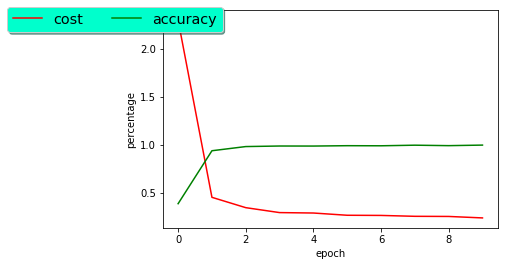

In [24]:
# Part taken from mnsit sample cnn code
# https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist
    
# Network tunable values
epochs = 50
batch_size = 128
display_step = 5


# what to plot
plot_cost = []
plot_acc = []

# For now just use Adam as it performs well
# But later try with RMS and AdaGrad as well to compare


# I tried with default rate value for Adam => 90%
# But, now introduced exponential decay as it may lead to faster global min
# Adam uses it implicity but I just wanted to try..
# t <- t + 1
# lr_t <- learning_rate * sqrt(1 - beta2^t) / (1 - beta1^t)

step = tf.Variable(0, trainable=False)
learning_rate = 0.001
decay_rate = learning_rate / epochs
rate = tf.train.exponential_decay(learning_rate, step, 1, decay_rate)
optimizer = tf.train.AdamOptimizer(rate).minimize(cross_entropy)

# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(epochs):

        # compute the overall batch size using trainable features and batch size
        full_batch_size = int(train_features.shape[0]/batch_size)
        
        # Loop over all batches            
        for batch_i in range(full_batch_size):
            batch_start = batch_i*batch_size
            batch_x = train_features[batch_start:batch_start + batch_size]
            batch_y = train_labels[batch_start:batch_start + batch_size]
            
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.75})         
        
        # Display logs per epoch step
        if epoch % display_step == 0:
            # run validation set
            c, acc = sess.run([cross_entropy, accuracy], feed_dict={x: valid_features, y: valid_labels, keep_prob: 1.})
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.5f}".format(c) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
            plot_cost.append(c)
            plot_acc.append(acc)
          
    print("Training Done!")

    
    # Test model
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    # Calculate accuracy - run test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Test Accuracy:", accuracy.eval({x: test_features, y: test_labels, keep_prob: 1.}))
    print("Validation Accuracy:", accuracy.eval({x: valid_features, y: valid_labels, keep_prob: 1.}))

    # Save the variables to disk
    save_path = saver.save(sess, "./model.ckpt")
    print("Model saved in file: %s" % save_path)
    
    plt.plot(plot_cost, 'r', label='cost')
    plt.plot(plot_acc, 'g', label='accuracy')
    legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large',bbox_to_anchor=(0.2, 1.05),ncol=3)
    legend.get_frame().set_facecolor('#00FFCC')

    plt.ylabel('percentage')
    plt.xlabel('epoch')
    plt.show()



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

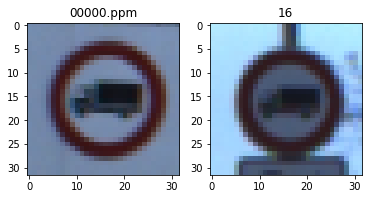

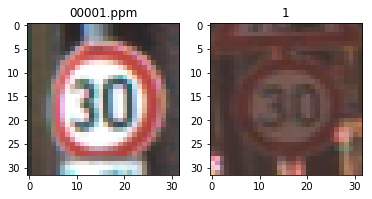

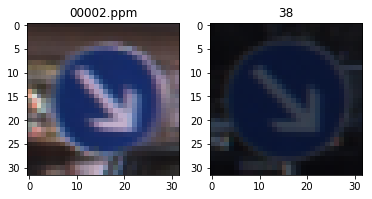

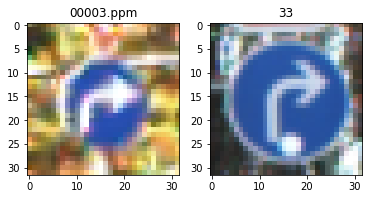

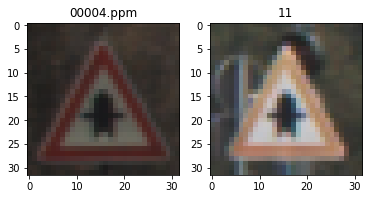

In [16]:
# Load and show images
import matplotlib.image as mpimg

# Read the test images from the specified dir
def read_image(path):
    image = mpimg.imread(path)
    return cv2.resize(image, (32, 32), interpolation = cv2.INTER_AREA)

test_img_dir = '/home/carnd/CarND-Traffic-Sign-Classifier-Project/image_dataset/'

# Images are taken from http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset#Structure
# German traffic sign dataset

# For the task, I have just selected 5 images and mapped it to the required class ID as mentioned in the csv file
# TODO read all from the csv and display appropiately

# Fixed image input size
input_w = 32
input_h = 32
input_channel = 3

file_name = []
file_name.append('00000.ppm')
file_name.append('00001.ppm')
file_name.append('00002.ppm')
file_name.append('00003.ppm')
file_name.append('00004.ppm')

# Mapping for the images to the class ids in the csv file
# TODO make a dictionary and do it for all available images

sign_name = {}
sign_name['00000.ppm'] = 16
sign_name['00001.ppm'] = 1
sign_name['00002.ppm'] = 38
sign_name['00003.ppm'] = 33
sign_name['00004.ppm'] = 11

test_images = np.zeros([len(file_name),input_w, input_h, input_channel], dtype=np.uint8)
test_classes = []

for index, name in enumerate(file_name):
    # Image from the test images
    test_images[index] = read_image(test_img_dir + name)
    fig = plt.figure()
    a=fig.add_subplot(1,2,1)
    a.set_title(name)
    plt.imshow(test_images[index])
    
    # Image from the training image set
    sign_val = sign_name[name]
    test_classes.append(sign_val)
    i = next(index for index, val in enumerate(y_train) if val==sign_val)
    a=fig.add_subplot(1,2,2)
    a.set_title(str(sign_val))
    plt.imshow(X_train[i])


### Predict the Sign Type for Each Image

Model restored.


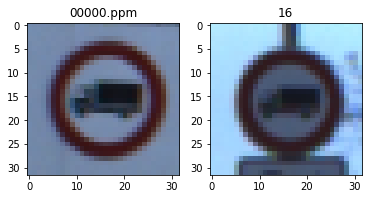

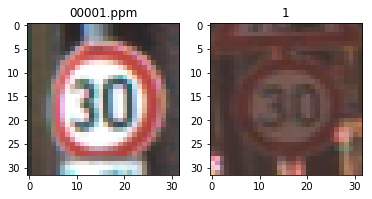

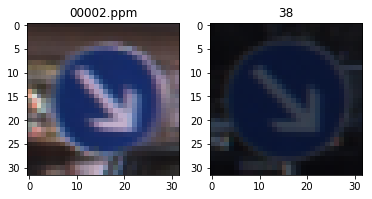

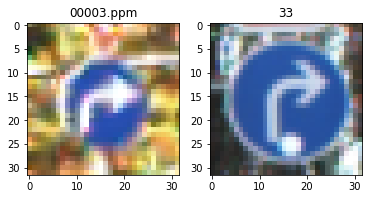

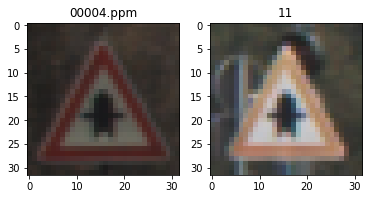

In [17]:
import tensorflow as tf

test_images_gray = convert_to_grayscale(test_images, 5, image_shape)
test_images_norm = normalize_data(test_images_gray)
test_images_encoded = encode_labels(test_classes)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()
success = []
count = 5
pred_val = tf.argmax(prediction, 1)
pred_softmax = tf.nn.softmax(prediction)
pred_top_5 = tf.nn.top_k(pred_softmax, k=5, sorted=True)
with tf.Session() as sess:
    
    # Restore variables from disk.
    saver.restore(sess, "./model.ckpt")
    print("Model restored.")
    
    value_top_5, result_top_5 = sess.run([pred_val, pred_top_5], feed_dict={x: test_images_norm, keep_prob: 1.})
    

# display the result

for index, name in enumerate(file_name):
    test_images[index] = read_image(test_img_dir + name)
    fig = plt.figure()
    a=fig.add_subplot(1,2,1)
    a.set_title(name)
    plt.imshow(test_images[index])
    
    # display an image from the training set that matches
    img_val = value_top_5[index]
    training_index = next(index for index, val in enumerate(y_train) if val==img_val)
    
    if img_val == sign_name[name]:
        # Correctly recognised sign ( baseline is the mapping done in the section above )
        success.append(name)
        
    a=fig.add_subplot(1,2,2)
    a.set_title(str(img_val))
    plt.imshow(X_train[training_index])

### Analyze Performance

In [18]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print("Prediction Performance = ", len(success)/5*100, "%")

Prediction Performance =  100.0 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

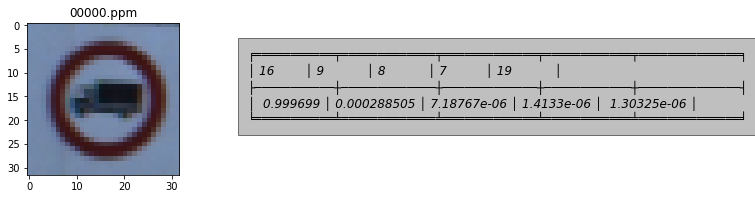

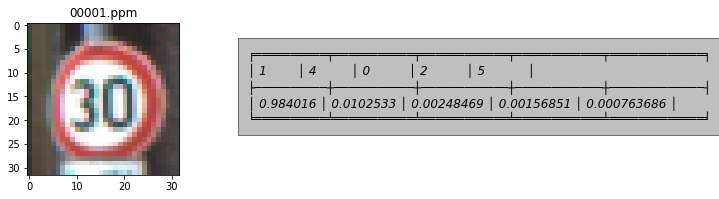

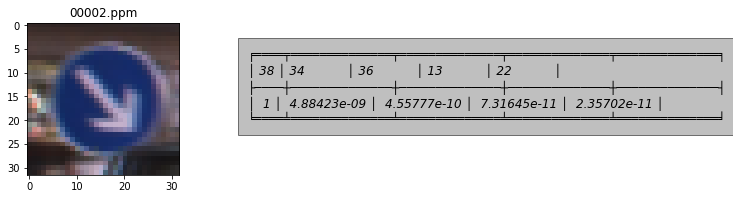

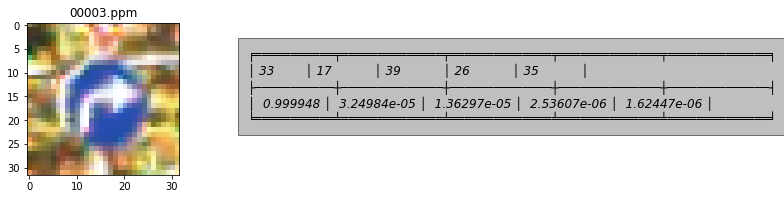

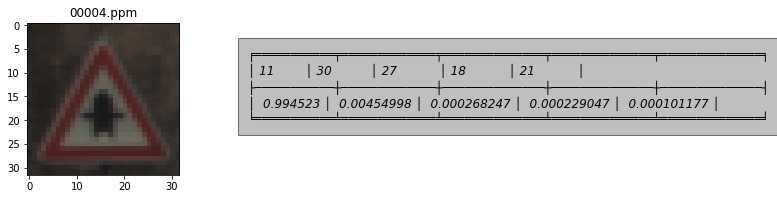

In [19]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

from tabulate import tabulate

for index, name in enumerate(file_name):
    np.set_printoptions(suppress=True)
    test_images[index] = read_image(test_img_dir + name)
    fig = plt.figure()
    a=fig.add_subplot(1,2,2)
    table = tabulate([result_top_5[1][index].reshape(5,1),result_top_5[0][index].reshape(5,1)], "", tablefmt="fancy_grid")
    a.set_title(name)
    plt.text(46, 20.5, table, style='italic',
    fontsize=12,
    bbox={'facecolor':'grey', 'alpha':0.5, 'pad':10})
    plt.imshow(test_images[index])
    #print(table)    
    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")